# Spam Mail Prediction

# Importing Libraries

In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Datasets

In [68]:
raw_mail_data = pd.read_csv("C:/Users/Sanket/Desktop/mail_data.csv")

# Data Pre-Processing


In [69]:
raw_mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [70]:
raw_mail_data.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [71]:
raw_mail_data.shape

(5572, 2)

In [72]:
raw_mail_data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [73]:
raw_mail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [74]:
raw_mail_data.isnull()

,Category,Message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [75]:
raw_mail_data.isnull().count()

Category    5572
Message     5572
dtype: int64

In [76]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'') 
#raw_mail_data.where(..., '') uses the boolean DataFrame from the previous step to replace True values with the corresponding 
#values from raw_mail_data and False values with an empty string (''). This effectively replaces null values with empty strings.

In [77]:
#Printing the first 5 rows of the dataframe 
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [78]:
#Checking the number of rows and columns in the Dataframe
mail_data.shape

(5572, 2)

# Label Encoding

In [79]:
#Label Spam mail as 0; ham mail as 1;

mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

In [80]:
#Seprating the Data as texts and label

X = mail_data ['Message']

Y = mail_data ['Category']

In [81]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [82]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


# Splitting the data into Training data & Test data

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [84]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


# Feature Extraction


In [85]:
#transform the text data to feature vectors that can be used as input to the Logistic Regression

feature_extraction = TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


#convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [86]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

# Training the Model

# Logistic Regression

In [87]:
model = LogisticRegression()

In [88]:
#training the LogisticRegression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

# Evaluating the trained model

In [89]:
#Prediction on training Data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [90]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9670181736594121


In [91]:
#Prediction on test Data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data= accuracy_score(Y_test, prediction_on_test_data)

In [92]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9659192825112107


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


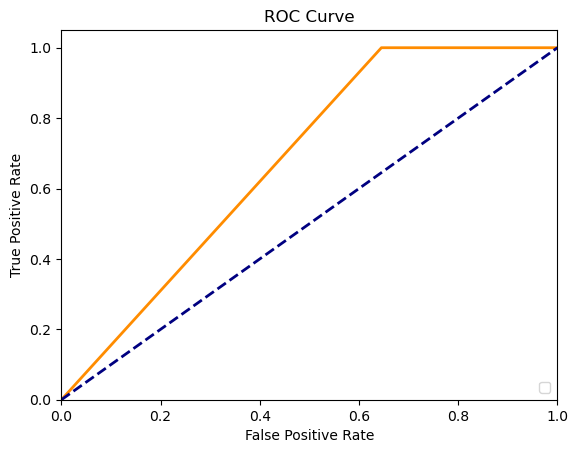

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  # Remove this line
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Building a Predictive System

In [93]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail) 
#This line transforms the input email's text into a feature vector using the same TfidfVectorizer that was used for the training data. It converts the text into a format


# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==0):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Spam mail


# Support Vector Machines

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the vectorizer on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [57]:
# Initialize and train the SVM model
model = SVC()
model.fit(X_train_tfidf, Y_train)

# Make predictions on the test data
predictions = model.predict(X_test_tfidf)

# Evaluate the model's performance
accuracy_on_test_data = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy_on_test_data)

Accuracy: 0.9838565022421525


# Random Forest

In [58]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, Y_train)

# Make predictions on the test set
Y_pred = rf_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.9767
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91       155
           1       0.97      1.00      0.99       960

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



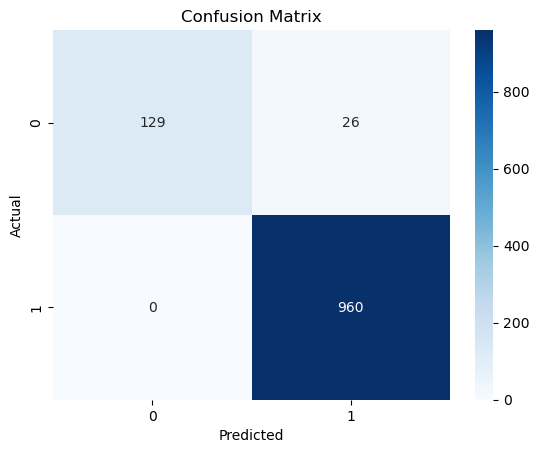

In [59]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

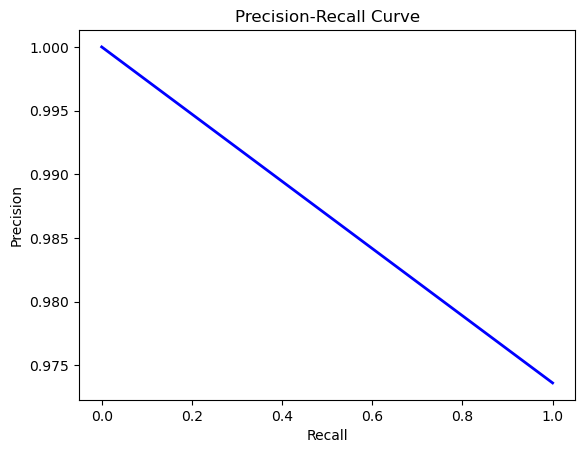

In [60]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred)
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Naive Bayes

In [61]:

# Initialize and train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, Y_train)

# Make predictions on the test set
Y_pred = nb_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.9570
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.69      0.82       155
           1       0.95      1.00      0.98       960

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.95      1115



# K-Nearest Neighbors (KNN)

In [62]:
# Initialize and train K-Nearest Neighbors model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_tfidf, Y_train)

# Make predictions on the test set
Y_pred = knn_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.9103
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.35      0.52       155
           1       0.91      1.00      0.95       960

    accuracy                           0.91      1115
   macro avg       0.95      0.68      0.74      1115
weighted avg       0.92      0.91      0.89      1115



C:\Users\Sanket\Desktop\New folder\andaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [63]:

# Assuming you have defined and trained each model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, Y_train)

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, Y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, Y_train)

svm_model = SVC()
svm_model.fit(X_train_tfidf, Y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_tfidf, Y_train)

# Now you can use the trained models for making predictions
Y_pred_lr = lr_model.predict(X_test_tfidf)
Y_pred_nb = nb_model.predict(X_test_tfidf)
Y_pred_rf = rf_model.predict(X_test_tfidf)
Y_pred_svm = svm_model.predict(X_test_tfidf)
Y_pred_knn = knn_model.predict(X_test_tfidf)

# Calculate accuracies
accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)

C:\Users\Sanket\Desktop\New folder\andaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


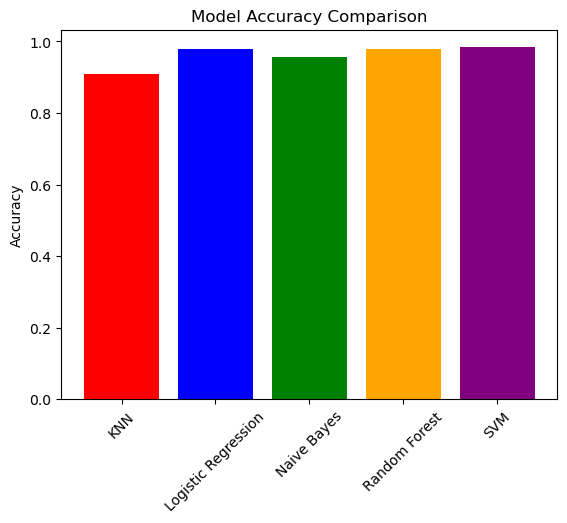

In [64]:

models = ['KNN', 'Logistic Regression', 'Naive Bayes', 'Random Forest', 'SVM']
accuracies = [accuracy_knn, accuracy_lr, accuracy_nb, accuracy_rf, accuracy_svm]

colors = ['red', 'blue', 'green', 'orange', 'purple']
plt.bar(models, accuracies, color=colors)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()